In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
exps = ['Ant', 'Walker2d']
for exp in exps:
    !python cs285/scripts/run_hw1.py \
    --eval_batch_size 5000 \
    --expert_policy_file cs285/policies/experts/{exp}.pkl \
    --env_name {exp}-v4 --exp_name bc_ant --n_iter 1 \
    --expert_data cs285/expert_data/expert_data_{exp}-v4.pkl \
    --video_log_freq -1

In [8]:
import numpy as np

In [ ]:
num_iter = np.linspace(250, 1250, num=5)
num_iter
for num in num_iter:
    !python cs285/scripts/run_hw1.py \
    --num_agent_train_steps_per_iter {int(num)} \
    --eval_batch_size 5000 \
    --expert_policy_file cs285/policies/experts/Ant.pkl \
    --env_name Ant-v4 --exp_name bc_ant --n_iter 1 \
    --expert_data cs285/expert_data/expert_data_Ant-v4.pkl \
    --video_log_freq -1

In [18]:
results = [-58.4774, 295.277, 1086.029, 2804.71, 3400.13]

In [3]:
Ant_means = [2804.71, 4304.81, 4442.32, 4693.56, 4142.26, 4766.41, 4690.6, 4770.27, 4735.28, 4827.01]
Ant_stds = [909.76, 89.10, 80.829, 145.3, 1297.05, 70.7, 112.125, 79.29, 123.6, 27.07]
# Ant_expert_means = [4713.65, 1668.14, 4189.08, 4611.68, 4422.6, 4600.2, 4644.19, 4450.57, 4676.0, 4875.58]
# Ant_expert_stds = [12.19, 29.96, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Walker_means = [361.6, 5125.33, 5190.07, 5243.77, 4364.71, 5392.38, 3998.28, 5253.05, 5343.425, 5359.75]
Walker_stds = [125.11, 189.11, 51.39, 44.76, 1627.05, 24.862, 1890.3, 151.86, 62.5, 25.47]
# Walker_expert_means = [5566.84, 348.11, 5243.01, 3633.10, 5271.2, 5134.71, 5358.55, 5248.3, 5416.73, 5330.55]
# Walker_expert_stds = [9.23, 116.7, 0.0, 1559.29, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

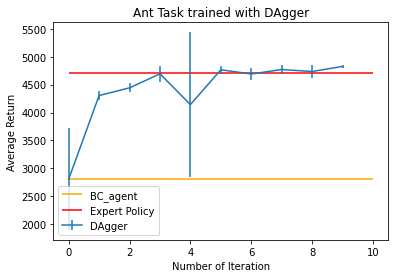

In [13]:
plt.hlines(xmin = 0, xmax = 10, y = 2804.71, color = 'orange' ,label = 'BC_agent')
plt.hlines(xmin = 0, xmax = 10, y = 4713.65, color = 'red' ,label = 'Expert Policy')
plt.errorbar(np.arange(10), Ant_means, Ant_stds, label = 'DAgger')
plt.legend()
plt.title('Ant Task trained with DAgger')
plt.xlabel('Number of Iteration')
plt.ylabel('Average Return')
plt.savefig('Dagger_Ant.png', dpi = 300)

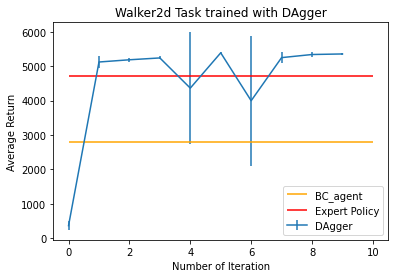

In [14]:
plt.errorbar(np.arange(10), Walker_means, Walker_stds, label = 'DAgger')
plt.hlines(xmin = 0, xmax = 10, y = 2804.71, color = 'orange' ,label = 'BC_agent')
plt.hlines(xmin = 0, xmax = 10, y = 4713.65, color = 'red' ,label = 'Expert Policy')
plt.legend()
plt.title('Walker2d Task trained with DAgger')
plt.xlabel('Number of Iteration')
plt.ylabel('Average Return')
plt.savefig('Dagger_Walker.png', dpi = 300)

In [ ]:
tasks = ['Ant', 'Walker2d']
for task in tasks:
    !python cs285/scripts/run_hw1.py \
    --eval_batch_size 5000 \
    --expert_policy_file cs285/policies/experts/{task}.pkl \
    --env_name {task}-v4 --exp_name dagger_ant --n_iter 10 \
    --do_dagger --expert_data cs285/expert_data/expert_data_{task}-v4.pkl \
    --video_log_freq -1